In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='training',
                                               target_size=(100, 100))

valid_data = train_datagen.flow_from_directory('data/train/',
                                               color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=256,
                                               subset='validation',
                                               target_size=(100, 100))

test_data = train_datagen.flow_from_directory('data/test',
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=256,
                                              target_size=(100, 100))

Found 3161 images belonging to 10 classes.
Found 349 images belonging to 10 classes.
Found 1170 images belonging to 10 classes.


In [3]:
train_data.class_indices

{'Apple 5': 0,
 'Apricot 1': 1,
 'Avocado 1': 2,
 'Banana 3': 3,
 'Beans 1': 4,
 'Blackberrie 1': 5,
 'Cabbage white 1': 6,
 'Cactus fruit 1': 7,
 'Carrot 1': 8,
 'Corn 1': 9}

In [4]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.optimizers import Adam

model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


for layer in model.layers:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

main = Model(inputs=model.input, outputs=predictions)

main.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = main.fit(train_data, validation_data=valid_data, epochs=5)

/opt/homebrew/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 196s 15s/step - accuracy: 0.5527 - loss: 1.3202 - val_accuracy: 0.9312 - val_loss: 0.4028
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - accuracy: 0.8760 - loss: 0.4000 - val_accuracy: 0.9828 - val_loss: 0.1304
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.9481 - loss: 0.1825 - val_accuracy: 0.9971 - val_loss: 0.0472
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.9801 - loss: 0.0921 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - accuracy: 0.9877 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0116


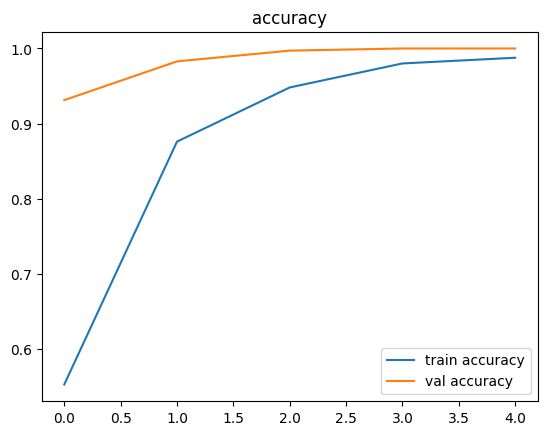

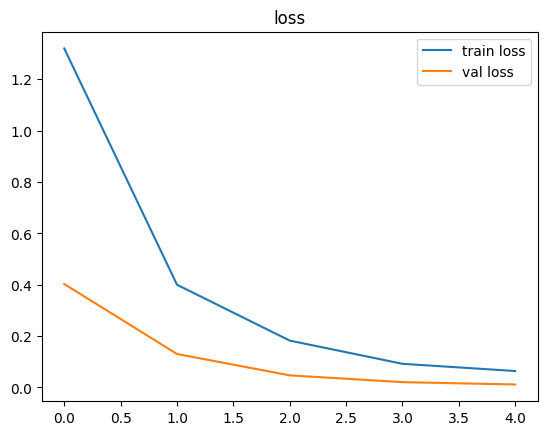

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.legend()
plt.show()

In [6]:
loss, accuracy = main.evaluate(test_data)
print(accuracy * 100)

5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.9179 - loss: 0.3840
91.79487228393555


In [7]:
model.save('models/vgg-924.h5')

In [8]:
main.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,511,264 (62.99 MB)

 Trainable params: 598,858 (2.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,197,718 (4.57 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


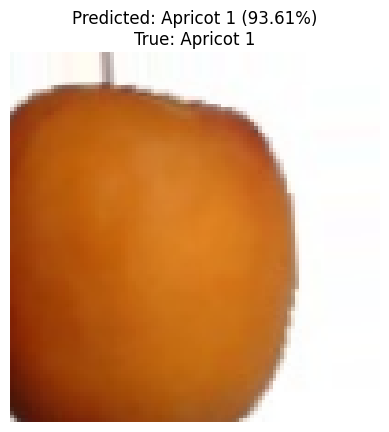

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


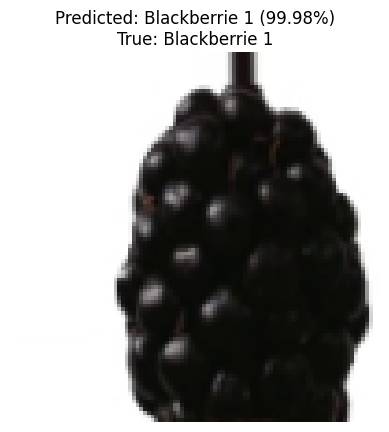

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


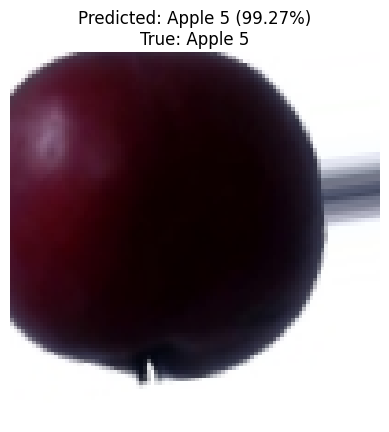

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


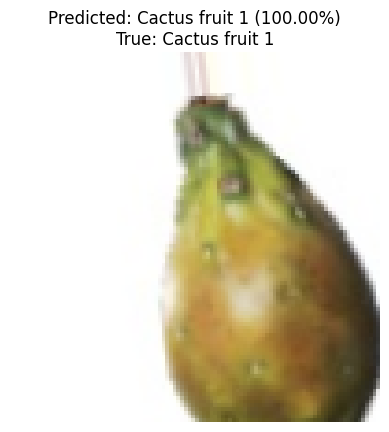

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


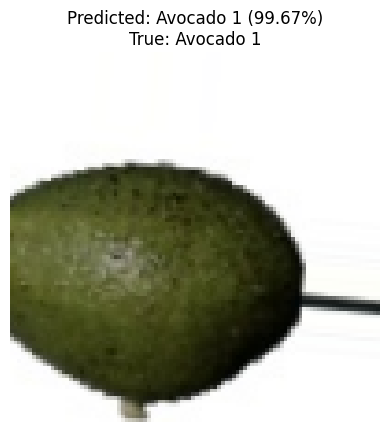

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class_indices = test_data.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

images, labels = next(test_data)

for i in range(5):
    img = images[i]
    true_label_idx = np.argmax(labels[i])
    true_label = idx_to_class[true_label_idx]

    img_input = np.expand_dims(img, axis=0)
    preds = main.predict(img_input)
    pred_label_idx = np.argmax(preds[0])
    pred_label = idx_to_class[pred_label_idx]
    confidence = preds[0][pred_label_idx]

    plt.imshow(img)
    plt.title(f"Predicted: {pred_label} ({confidence*100:.2f}%)\nTrue: {true_label}")
    plt.axis('off')
    plt.show()